In [37]:
import pandas as pd

df = pd.read_csv('metadata.csv', low_memory=False)
print(df.head(20))
print(df.info())


    cord_uid                                       sha source_x  \
0   ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1   02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2   ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3   2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4   9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   
5   zjufx4fo  b2897e1277f56641193a6db73825f707eed3e4c9      PMC   
6   5yhe786e  3bb07ea10432f7738413dff9816809cc90f03f99      PMC   
7   8zchiykl  5806726a24dc91de3954001effbdffd7a82d54e2      PMC   
8   8qnrcgnk  faaf1022ccfe93b032c5608097a53543ba24aedb      PMC   
9   jg13scgo  5b44feca5d6ffaaeb66501fa84cc6dd44d06660a      PMC   
10  5tkvsudh  9d4e3e8eb092d5ed282d0aa4aadcaa8b7165b5e9      PMC   
11  6lvn10f4  14e0cac6e86d62859e6c9f1351ab67466d89e5b3      PMC   
12  tvxpckxo  d09b79026117ec9faebba46a8d13aa9b23ec751e      PMC   
13  mcuixluu  44102e3e69e70ad2a73e753133283334ce1f8736      PM

In [38]:
print(df.isnull().sum())

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64


In [41]:
df = df.drop(columns=['cord_uid', 'source_x', 'sha', 'pmcid', 'license', 'mag_id'])

In [42]:
df['title'] = df['title'].str.replace('[^a-zA-Z0-9]', ' ')
df['abstract'] = df['abstract'].str.replace('[^a-zA-Z0-9]', ' ')

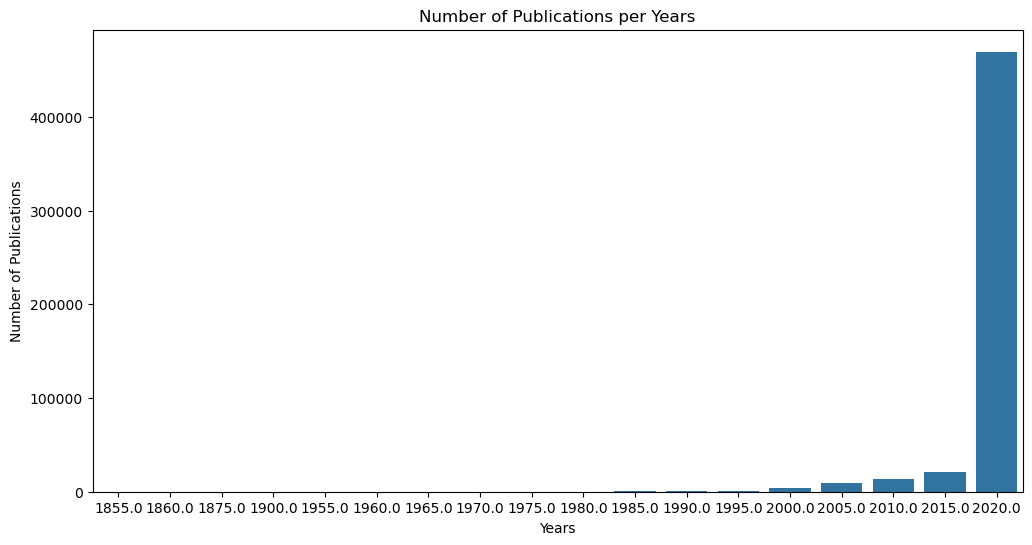

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year


df['period'] = (df['year'] // 5) * 5


plt.figure(figsize=(12, 6))
sns.countplot(x='period', data=df.dropna(subset=['period']))
plt.xlabel('Years')
plt.ylabel('Number of Publications')
plt.title('Number of Publications per Years')
plt.show()